In [5]:
import torch
import torch.nn as nn
import numpy
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.datasets import fetch_olivetti_faces

BATCH_SIZE = 10
epochs = 50
lr = 0.01

olivetti_faces = fetch_olivetti_faces(data_home=r'./face_data',shuffle=True)
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)
dataset = [(img,lbl) for img,lbl in zip(images,targets)]
dataloader = DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 损失函数
loss_fn = nn.CrossEntropyLoss()

In [6]:
# 比较归一化
model1 = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.Linear(8192,16438),
    nn.ReLU(),
    nn.Linear(16438,1024),
    nn.ReLU(),
    nn.Linear(1024,40)
).to(device)

model2 = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192,16438),
    nn.BatchNorm1d(16438),
    nn.ReLU(),
    nn.Linear(16438,1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Linear(1024,40)
).to(device)

# 比较正则
model3 = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192,16438),
    nn.BatchNorm1d(16438),
    nn.ReLU(),
    nn.Linear(16438,1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024,40)
).to(device)

In [7]:
def trainer(model):
    # 优化器
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    loss_arr = []
    # 模型训练
    for epoch in range(epochs):
        # 提取训练数据
        for data, target in dataloader:
            target = torch.tensor(target).to(device)
            data = data.to(device)
            # 前向运算
            output = model(data)
            # 计算损失
            loss = loss_fn(output, target.long())
            # 反向传播
            optimizer.zero_grad() # 所有参数梯度清零
            loss.backward() # 计算梯度，保存到.grad
            optimizer.step() # 更新参数
            
        print(f'Epoch {epoch}, Loss {loss.item()}')
        loss_arr.append(loss.item())
    
    return loss_arr

In [8]:
loss_arr1 = trainer(model1) # 不加归一层和正则

C:\Users\lisheng\AppData\Local\Temp\ipykernel_37364\3339553922.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 3.6920325756073
Epoch 1, Loss 3.72430419921875
Epoch 2, Loss 3.712313413619995
Epoch 3, Loss 3.718754291534424
Epoch 4, Loss 3.6961474418640137
Epoch 5, Loss 3.723249912261963
Epoch 6, Loss 3.696402072906494
Epoch 7, Loss 3.701084852218628
Epoch 8, Loss 3.690798282623291
Epoch 9, Loss 3.6924118995666504
Epoch 10, Loss 3.703105926513672
Epoch 11, Loss 3.70740008354187
Epoch 12, Loss 3.702594041824341
Epoch 13, Loss 3.7115020751953125
Epoch 14, Loss 3.697317123413086
Epoch 15, Loss 3.7043800354003906
Epoch 16, Loss 3.7067489624023438
Epoch 17, Loss 3.6949095726013184
Epoch 18, Loss 3.700530529022217
Epoch 19, Loss 3.7035439014434814
Epoch 20, Loss 3.711824417114258
Epoch 21, Loss 3.7027173042297363
Epoch 22, Loss 3.704230785369873
Epoch 23, Loss 3.7004876136779785
Epoch 24, Loss 3.6997108459472656
Epoch 25, Loss 3.700294017791748
Epoch 26, Loss 3.6933846473693848
Epoch 27, Loss 3.7068965435028076
Epoch 28, Loss 3.6940360069274902
Epoch 29, Loss 3.698612928390503
Epoch 30, L

In [9]:
loss_arr2 = trainer(model2) # 归一化和不正则

C:\Users\lisheng\AppData\Local\Temp\ipykernel_37364\3339553922.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 6.082869529724121
Epoch 1, Loss 1.9532371759414673
Epoch 2, Loss 1.1961870193481445
Epoch 3, Loss 1.5942442417144775
Epoch 4, Loss 0.4018145501613617
Epoch 5, Loss 0.5778535604476929
Epoch 6, Loss 0.3428707718849182
Epoch 7, Loss 0.19691118597984314
Epoch 8, Loss 0.8569976091384888
Epoch 9, Loss 0.4671701490879059
Epoch 10, Loss 0.40953025221824646
Epoch 11, Loss 0.8136346936225891
Epoch 12, Loss 0.6373135447502136
Epoch 13, Loss 0.592876672744751
Epoch 14, Loss 1.582557201385498
Epoch 15, Loss 0.43306344747543335
Epoch 16, Loss 0.06343621760606766
Epoch 17, Loss 0.10086284577846527
Epoch 18, Loss 0.2853216826915741
Epoch 19, Loss 0.134535014629364
Epoch 20, Loss 1.7534757852554321
Epoch 21, Loss 1.2493336200714111
Epoch 22, Loss 0.0067979721352458
Epoch 23, Loss 0.07968638092279434
Epoch 24, Loss 0.2481749802827835
Epoch 25, Loss 0.005906394217163324
Epoch 26, Loss 0.005214594304561615
Epoch 27, Loss 0.6003349423408508
Epoch 28, Loss 0.0059907385148108006
Epoch 29, Loss 

In [10]:
loss_arr3 = trainer(model3) # 归一化和正则

C:\Users\lisheng\AppData\Local\Temp\ipykernel_37364\3339553922.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 2.8228766918182373
Epoch 1, Loss 3.7252249717712402
Epoch 2, Loss 2.6610970497131348
Epoch 3, Loss 3.5713608264923096
Epoch 4, Loss 1.0928685665130615
Epoch 5, Loss 1.4408077001571655
Epoch 6, Loss 0.6120026707649231
Epoch 7, Loss 0.49785321950912476
Epoch 8, Loss 0.4924774169921875
Epoch 9, Loss 0.39510005712509155
Epoch 10, Loss 0.721331775188446
Epoch 11, Loss 0.12045099586248398
Epoch 12, Loss 0.636206865310669
Epoch 13, Loss 0.33907777070999146
Epoch 14, Loss 0.20980055630207062
Epoch 15, Loss 0.48457083106040955
Epoch 16, Loss 0.10109248012304306
Epoch 17, Loss 0.036038435995578766
Epoch 18, Loss 0.10713684558868408
Epoch 19, Loss 0.020717140287160873
Epoch 20, Loss 0.49270668625831604
Epoch 21, Loss 0.0012037389678880572
Epoch 22, Loss 0.40811267495155334
Epoch 23, Loss 0.10781539976596832
Epoch 24, Loss 0.3164902627468109
Epoch 25, Loss 0.056749988347291946
Epoch 26, Loss 0.06552349030971527
Epoch 27, Loss 0.023062461987137794
Epoch 28, Loss 0.012376159429550171
E

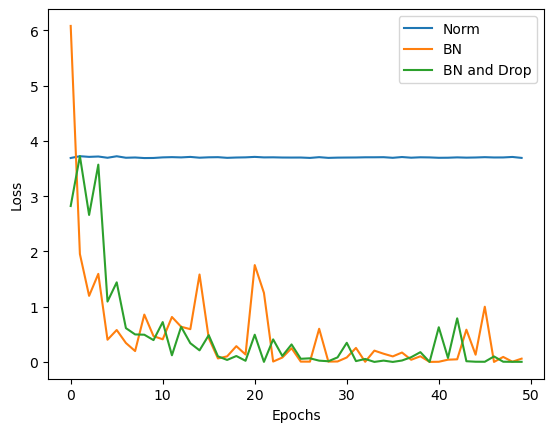

In [13]:
import matplotlib.pyplot as plt

plt.plot(loss_arr1,label="Norm")
plt.plot(loss_arr2,label="BN")
plt.plot(loss_arr3,label="BN and Drop")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()